# Testing and validating your model

## Recap

**Supervised Machine Learning** = approximating a target function  _f_  that maps input variables _X_ to an output variable _Y_.

**Linear Regression** = The target function is linear and we _regress_ towards a fitting model by minimizing a loss function.

How well does this found target function generalize to new data?

## Population vs. Sample
![](img/sample.png)

- in ML you learn from data that is **not** the entire population, but on a sample

How do we know how our model performs on data that is **not** from the sample?

- hide some data from the model when training it (reducing the sample)
- test the performance of the model on the data that it hasn't seen before

### Cross-validation

- out-of-sample testing 
- assessing how the model _generalizes_ to an unseen data set. 
- The goal is to flag problems like _over-_ and _underfitting_ and test the ability of the model to generalize

### Generalization
- measure of how accurately a model is able to predict outcome values for unseen data

## Training and Testing data

- **Training data**: the data that the model sees
- **Testing data**: the data that the model is tested against

The model should **never** be trained on test data

We can use the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) library to help us, split the data into test and training data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("data/science.csv")
df

,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


<AxesSubplot:xlabel='US science spending', ylabel='Suicides'>

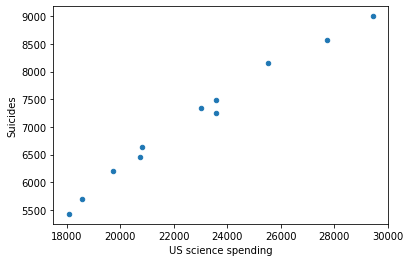

In [7]:
df.plot.scatter(x=1, y=2)

In [8]:
X = df['US science spending']
Y = df['Suicides']

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train


array([[23029],
       [20734],
       [18594],
       [23597],
       [29449],
       [18079],
       [23584],
       [20831]], dtype=int64)

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([0.31098424])

In [11]:
model.score(x_train, y_train)

0.9821810694094874

**Note**: We tested on data that was already seen!

In [12]:
model.score(x_test, y_test)

0.9823268511749296

Now, that's a beautiful score! Seems like we can predict suicide rates in the US based on the science spending!

Or can we?

**No**. The theory doesn't fit in this case.

## Prediction Errors

**Bias**: 

_Bias are the simplifying assumptions made by a model to make the target function easier to learn._

- average squared difference between predictions and true values (= **mean squared error**)
- measure of how good your model fits the data. 
- zero bias = model captures reality perfectly (unlikely to ever be seen in a model)
- values closer to zero are better

**Variance**: 

_Variance is the amount that the estimate of the target function will change if different training data was used._

- a model has high variance if its predictions are sensitive to small changes in the input. 
- high variance often means overfitting, because the model seems to have captured random noise or outliers

_You want a model that has low bias and low variance._

## Measure of quality of model (goodness of fit)

**The R-squared score**

- statistical measure of how close the data are to the fitted regression line
- coefficient of determination
- percentage of dependent variable variation that is explained by independent variable

## Overfitting and Underfitting

![](img/overfitting.png)

- cause of poor performance in Machine Learning
- more common with nonlinear models that have more flexibility when learning a target function

**Overfitting**: 
- model captures noise along with the underlying pattern in the data. 
- Gap between training loss and validation loss is a hint that the model does not generalize well. 
- model has low bias and high variance. 
- solution: stop training earlier. 

**Underfitting**: 
- refers to a model that can neither model the training data nor generalize to new data. 
- Caused by stopping training too early or the wrong model (e.g. the data cannot be modeled by a linear function). 
- model has high bias and low variance 

- training loss vs. validation loss

![](img/overfitting_curve.jpg)